<a href="https://colab.research.google.com/github/lamtraf/somefantasticthings/blob/main/Music_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import regex as re
from IPython.display import Audio
import tensorflow as tf
import os
import random

In [3]:
dataset = pd.read_csv('/content/gdrive/MyDrive/input.txt', on_bad_lines='skip')
dataset

X: 1
0                                T: The Enchanted Valley
1                                                 M: 2/4
2                                                L: 1/16
3                                       B: "O'Neill's 1"
4               N: "Very slow" "collected by J. O'Neill"
...                                                  ...
56032                                              M:9/8
56033  |: (FGF)  F2 D  G2 E | (FGF) F2 D E2 D | (FGF)...
56034  |: (BcB) (BAG) (FGA) | B2 E  E2 F G2 B | (ABc)...
56035  |: (fgf)  f2 d  g2 e | (fgf) f2 d e2 d | (fgf)...
56036  |: (gfe) (dcB) (AGF) | B2 E  E2 F G2 B | (ABc)...

[56037 rows x 1 columns]

In [4]:
def extract_song_nippet(text):
  pattern = '(^|\n\n)(.*?)\n\n'
  search_song = re.findall(pattern, text, flags=re.DOTALL, overlapped=True)
  songs = [song[1] for song in search_song]
  print('Found {} songs in text'.format(len(songs)))
  return songs

In [5]:
with open(os.path.join('/content/gdrive/MyDrive/input.txt'),'r') as f:
  text = f.read()
songs = extract_song_nippet(text)


Found 8207 songs in text


In [6]:
example_song = songs[25]
print(example_song)


X: 14
T: The Siege of Troy
M: 6/8
L: 1/8
B: "O'Neill's 14"
N: "Slow" "collected by J. O'Neill"
Z: "Transcribed by Norbert Paap, norbertp@bdu.uva.nl"
K:Gm
B/2-c/2 | d>dd cA^F | G>GG (G2A/2B/2) | cAB cAG | FDE (D2 B/2c/2) |
d=Bc dBc | d=e^f ~(g2 d/2=e/2) | fdB {d}cA^F | G>GG G2 ||
B/2d/2 | g^fg gag | {g}f=ef (d2 d/2e/2) | f=ed cdc | BAG (F2 G/2A/2) |
BAB c=Bc | d=e^f ~(g2 d/2e/2) | fdB {d}cAF | G>GG G2 ||


In [7]:
!apt-get install timidity

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fluid-soundfont-gm libao-common libao4
Suggested packages:
  fluid-soundfont-gs libaudio2 libsndio6.1 freepats pmidi timidity-daemon
The following NEW packages will be installed:
  fluid-soundfont-gm libao-common libao4 timidity
0 upgraded, 4 newly installed, 0 to remove and 16 not upgraded.
Need to get 130 MB of archives.
After this operation, 151 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fluid-soundfont-gm all 3.1-5.3 [130 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libao-common all 1.2.2+20180113-1.1ubuntu3 [6,568 B]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libao4 amd64 1.2.2+20180113-1.1ubuntu3 [35.2 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 timidity amd64 2.14.0-8ubuntu1 [683 kB]
Fetched 130 MB in 5s (28.5 MB/s)
Selectin

In [8]:
!apt-get install abcmidi

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  abcm2ps postscript-viewer
The following NEW packages will be installed:
  abcmidi
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 306 kB of archives.
After this operation, 868 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 abcmidi amd64 20220218+ds1-1 [306 kB]
Fetched 306 kB in 1s (539 kB/s)
Selecting previously unselected package abcmidi.
(Reading database ... 120979 files and directories currently installed.)
Preparing to unpack .../abcmidi_20220218+ds1-1_amd64.deb ...
Unpacking abcmidi (20220218+ds1-1) ...
Setting up abcmidi (20220218+ds1-1) ...
Processing triggers for man-db (2.10.2-1) ...


In [9]:
def save_song_to_abc(song, filename='tmp'):
  save_name = '{}.abc'.format(filename)
  with open(save_name, 'w') as f:
    f.write(song)
  return filename

# def abc2wav(abc_file):
#   suf = abc_file.rstrip('.abc')
#   cmd = "abc2midi {} -o {}".format(abc_file, suf + ".mid")
#   os.system(cmd)
#   cmd = "timidity {}.mid -Ow {}.wav".format(suf, suf)
#   print(cmd)
#   return os.system(cmd)
def abc2wav(abc_file):
    suf = abc_file.rstrip('.abc')
    cmd = 'abc2midi {} -o {}'.format(abc_file, suf+'.mid')
    os.system(cmd)
    cmd = 'timidity {}.mid -Ow {}'.format(suf,suf+'.wav')
    return os.system(cmd)

def play_wav(wav_file):
  return Audio(wav_file, autoplay=True, rate=512)

def play_song(song):
  base = save_song_to_abc(song)
  ret = abc2wav(base+'.abc')
  if ret == 0:
    return play_wav(base+'.wav')
  return "Nothing happen"


In [10]:
play_song(example_song)

In [11]:
songs_joined = '\n\n'.join(songs)
vocab = sorted(set(songs_joined))
print("There are",len(vocab),"unique characters in the dataset")
print(vocab)

There are 95 unique characters in the dataset
['\t', '\n', ' ', '!', '"', '#', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~']


In [12]:
char2idx = {u:i for i, u in enumerate(vocab)} #this line means that we mapping unique character to a index.
print(char2idx)
idx2char = np.array(vocab)
print(idx2char)

{'\t': 0, '\n': 1, ' ': 2, '!': 3, '"': 4, '#': 5, '%': 6, '&': 7, "'": 8, '(': 9, ')': 10, '*': 11, '+': 12, ',': 13, '-': 14, '.': 15, '/': 16, '0': 17, '1': 18, '2': 19, '3': 20, '4': 21, '5': 22, '6': 23, '7': 24, '8': 25, '9': 26, ':': 27, ';': 28, '<': 29, '=': 30, '>': 31, '?': 32, '@': 33, 'A': 34, 'B': 35, 'C': 36, 'D': 37, 'E': 38, 'F': 39, 'G': 40, 'H': 41, 'I': 42, 'J': 43, 'K': 44, 'L': 45, 'M': 46, 'N': 47, 'O': 48, 'P': 49, 'Q': 50, 'R': 51, 'S': 52, 'T': 53, 'U': 54, 'V': 55, 'W': 56, 'X': 57, 'Y': 58, 'Z': 59, '[': 60, '\\': 61, ']': 62, '^': 63, '_': 64, 'a': 65, 'b': 66, 'c': 67, 'd': 68, 'e': 69, 'f': 70, 'g': 71, 'h': 72, 'i': 73, 'j': 74, 'k': 75, 'l': 76, 'm': 77, 'n': 78, 'o': 79, 'p': 80, 'q': 81, 'r': 82, 's': 83, 't': 84, 'u': 85, 'v': 86, 'w': 87, 'x': 88, 'y': 89, 'z': 90, '{': 91, '|': 92, '}': 93, '~': 94}
['\t' '\n' ' ' '!' '"' '#' '%' '&' "'" '(' ')' '*' '+' ',' '-' '.' '/' '0'
 '1' '2' '3' '4' '5' '6' '7' '8' '9' ':' ';' '<' '=' '>' '?' '@' 'A' 'B'
 'C

In [13]:
print('{')
for char,_ in zip(char2idx, range(35)):
    print('  {:4s}: {:3d},'.format(repr(char), char2idx[char]))
print('  ...\n}')

{
  '\t':   0,
  '\n':   1,
  ' ' :   2,
  '!' :   3,
  '"' :   4,
  '#' :   5,
  '%' :   6,
  '&' :   7,
  "'" :   8,
  '(' :   9,
  ')' :  10,
  '*' :  11,
  '+' :  12,
  ',' :  13,
  '-' :  14,
  '.' :  15,
  '/' :  16,
  '0' :  17,
  '1' :  18,
  '2' :  19,
  '3' :  20,
  '4' :  21,
  '5' :  22,
  '6' :  23,
  '7' :  24,
  '8' :  25,
  '9' :  26,
  ':' :  27,
  ';' :  28,
  '<' :  29,
  '=' :  30,
  '>' :  31,
  '?' :  32,
  '@' :  33,
  'A' :  34,
  ...
}


In [14]:
def vectorize_song(string):
  vectorize_list = np.array([char2idx[s] for s in string])
  return vectorize_list

vectorized_song = vectorize_song(songs_joined)

In [15]:
print('{} character maps to int {}'.format(repr(songs_joined[:10]),vectorized_song[:10]))


'X: 1\nT: Th' character maps to int [57 27  2 18  1 53 27  2 53 72]


In [16]:
def get_batch(vectorized_song, seq_length, batch_size):
  n = vectorized_song.shape[0]- 1
  idx = np.random.choice(n-seq_length, batch_size)
  input_batch = [vectorized_song[i:i+seq_length] for i in idx]
  output_batch = [vectorized_song[i+1:i+1+seq_length] for i in idx]

  x_batch = np.reshape(input_batch, [batch_size, seq_length])
  y_batch = np.reshape(output_batch, [batch_size, seq_length])
  return x_batch, y_batch

In [17]:
x_batch, y_batch = get_batch(vectorized_song, seq_length=5, batch_size=1)
for i, (input_idx, target_idx) in enumerate(zip(np.squeeze(x_batch), np.squeeze(y_batch))):
    print("Step {:3d}".format(i))
    print("  input: {} ({:s})".format(input_idx, repr(idx2char[input_idx])))
    print("  expected output: {} ({:s})".format(target_idx, repr(idx2char[target_idx])))

Step   0
  input: 1 ('\n')
  expected output: 57 ('X')
Step   1
  input: 57 ('X')
  expected output: 27 (':')
Step   2
  input: 27 (':')
  expected output: 18 ('1')
Step   3
  input: 18 ('1')
  expected output: 24 ('7')
Step   4
  input: 24 ('7')
  expected output: 19 ('2')


In [20]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
  model = tf.keras.Sequential([
      tf.keras.layers.Embedding(vocab_size, embedding_dim, batch_input_shape=[batch_size, None]),
      tf.keras.layers.LSTM(
          rnn_units,
          return_sequences=True,
          recurrent_initializer='glorot_uniform',
          recurrent_activation='sigmoid',
          stateful=True,
      ),
      tf.keras.layers.Dense(units=vocab_size)
  ])
  return model



In [22]:
model = build_model(len(vocab), embedding_dim=256, rnn_units=1024, batch_size=32)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (32, None, 256)           24320     
                                                                 
 lstm_1 (LSTM)               (32, None, 1024)          5246976   
                                                                 
 dense_1 (Dense)             (32, None, 95)            97375     
                                                                 
Total params: 5,368,671
Trainable params: 5,368,671
Non-trainable params: 0
_________________________________________________________________


In [24]:
x, y = get_batch(vectorized_song, seq_length=100, batch_size=32)
pred = model(x)
print("Input shape:      ", x.shape, " # (batch_size, sequence_length)")
print("Prediction shape: ", pred.shape, "# (batch_size, sequence_length, vocab_size)")

Input shape:       (32, 100)  # (batch_size, sequence_length)
Prediction shape:  (32, 100, 95) # (batch_size, sequence_length, vocab_size)


In [30]:
def compute_loss(labels, logits):
  loss = tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)
  return loss

In [26]:
num_training_iterations = 2000
batch_size = 4
seq_length = 100
learning_rate = 5e-3
vocab_size = len(vocab)
embedding_dim = 256
rnn_units = 1024

In [27]:
import time
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
class PeriodicPlotter:
  def __init__(self, sec, xlabel='', ylabel='', scale=None):

    self.xlabel = xlabel
    self.ylabel = ylabel
    self.sec = sec
    self.scale = scale

    self.tic = time.time()

  def plot(self, data):
    if time.time() - self.tic > self.sec:
      plt.cla()

      if self.scale is None:
        plt.plot(data)
      elif self.scale == 'semilogx':
        plt.semilogx(data)
      elif self.scale == 'semilogy':
        plt.semilogy(data)
      elif self.scale == 'loglog':
        plt.loglog(data)
      else:
        raise ValueError("unrecognized parameter scale {}".format(self.scale))

      plt.xlabel(self.xlabel); plt.ylabel(self.ylabel)
      ipythondisplay.clear_output(wait=True)
      ipythondisplay.display(plt.gcf())

      self.tic = time.time()

In [32]:
pip install tqdm

In [36]:
from tqdm import tqdm

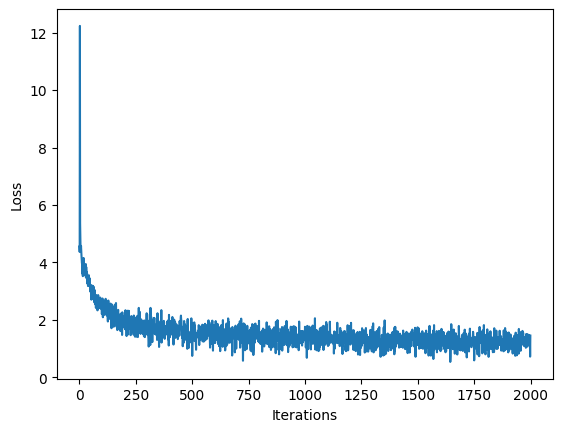

100%|██████████| 2000/2000 [2:30:05<00:00,  4.50s/it]


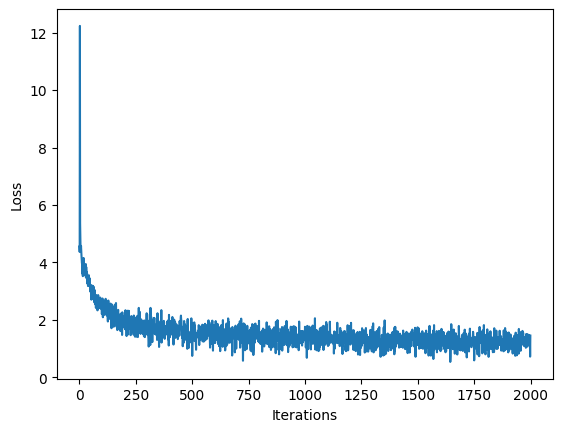

In [39]:
model = build_model(vocab_size, embedding_dim, rnn_units, batch_size)
model.summary()
optimizer = tf.keras.optimizers.Adam(learning_rate)
def train_step (x, y):
  with tf.GradientTape() as tape:
    y_hat = model(x)
    loss = compute_loss(y, y_hat)
  grads = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(grads, model.trainable_variables))
  return loss

save_file = os.path.join("/content/gdrive/MyDrive",'my_generation_music')
history = []
plotter = PeriodicPlotter(sec = 2, xlabel = 'Iterations', ylabel = 'Loss')
if hasattr(tqdm, '_instances'): tqdm._instances.clear()

for iter in tqdm(range(num_training_iterations)):
  x_batch, y_batch = get_batch(vectorized_song, seq_length, batch_size)
  loss = train_step(x_batch, y_batch)
  history.append(loss.numpy().mean())
  plotter.plot(history)

  if iter % 100 == 0:
    model.save_weights(save_file)


model.save_weights(save_file)

In [47]:
model = build_model(vocab_size, embedding_dim, rnn_units, batch_size=1)
save_file_n = save_file + '.h5'
model.load_weights(tf.train.latest_checkpoint(save_file_n))
model.build(tf.TensorShape([1, None]))

model.summary()

AttributeError: ignored

In [41]:
def generate_text(model, start_string, generation_length=1000):
  input_eval = [char2idx[s] for s in start_string]
  input_eval = tf.expand_dims(input_eval, 0)
  text_generated = []
  model.reset_states()
  tqdm._instances.clear()
  for i in tqdm(range(generation_length)):
    predictions = model(input_eval)
    predictions = tf.squeeze(predictions, 0)
    predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()
    input_eval = tf.expand_dims([predicted_id], 0)
    text_generated.append(idx2char[predicted_id])
  return (start_string + ''.join(text_generated))


In [42]:
generated_text = generate_text(model, start_string="X", generation_length=1000)

100%|██████████| 1000/1000 [00:16<00:00, 59.14it/s]


In [46]:
generated_songs = extract_song_nippet(generated_text)

for i, song in enumerate(generated_songs):
  # Synthesize the waveform from a song
  waveform = play_song(song)

  # If its a valid song (correct syntax), lets play it!
  if waveform:
    print("Generated song", i)
    ipythondisplay.display(waveform)

Found 0 songs in text
